In [6]:
pip install FER

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [8]:
location_videofile = "/content/WIN_20220701_17_01_34_Pro.mp4"

# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [10]:
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.04 fps, 113 frames, 3.76 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/WIN_20220701_17_01_34_Pro_output.mp4
100%|██████████| 113/113 [02:27<00:00,  1.31s/frames]
INFO:fer:Completed analysis: saved to output/WIN_20220701_17_01_34_Pro_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 44%
INFO:fer:Compressing: 88%
INFO:fer:Zip has finished


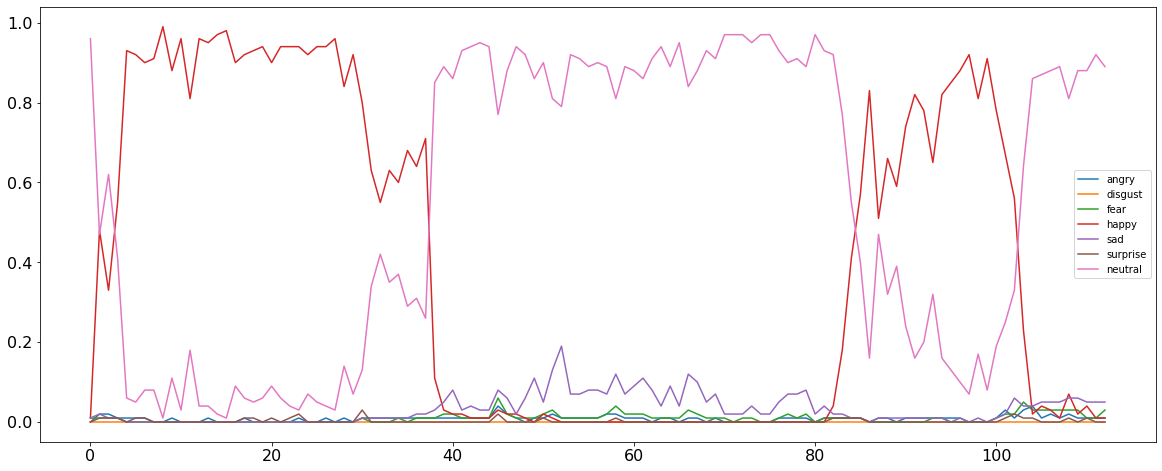

In [11]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [14]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,0.97
1,Fear,1.10
2,Happy,45.48
3,Sad,3.71
4,Surprise,0.29
5,Neutral,61.18
